Exploratory Analysis: Visualizations
- Prices vs Total Distance Traveled 
- Distribution of Tickets Bought per Origin Airport
- Distribution of Tickets Bought per Destination Airport
- Correlation Matrix between all Numerical Variables

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the data
chunksize=10000
df = pd.read_csv('/Users/kaylienguyen/Downloads/itineraries.csv', chunksize = chunksize)
print('Successfully read csv')

Successfully read csv


In [3]:
#Display a chunk of the data. I will be working with only 10,000 rows of data. Note: this may affect our results, however, it was randomized
#to eliminate bias. 
chunked_df = next(df)
chunked_df = chunked_df.sample(frac=1, random_state=42)
display(chunked_df)
print(chunked_df.info())

legId  searchDate  flightDate  \
6252  42ad9a7ee89845a6f1ad24fb2752d7b7  2022-04-16  2022-04-17   
4684  15beafefec9f073253a15565deb36bd1  2022-04-16  2022-04-17   
1731  3f14d949df3493ff68a20427172bb153  2022-04-16  2022-04-17   
4742  9e4264d5d6db5cb271884f97f82c3f7c  2022-04-16  2022-04-17   
4521  f2413f98f5726d05947eacd0402be0ce  2022-04-16  2022-04-17   
...                                ...         ...         ...   
5734  0e94753b40077240ffebe3f246249708  2022-04-16  2022-04-17   
5191  f29117f1e75f16010f8652a4a5673420  2022-04-16  2022-04-17   
5390  9ee183e46e9a92d6e0cf030b311c3c4a  2022-04-16  2022-04-17   
860   af37cef7a840e30dddf1273d1a49002f  2022-04-16  2022-04-17   
7270  88cc39e016ccbd6257d786f80eed8bdb  2022-04-16  2022-04-17   

     startingAirport destinationAirport fareBasisCode travelDuration  \
6252             OAK                SFO      QA0QA0MQ        PT7H51M   
4684             LAX                DTW      LH0OAVMN       PT11H55M   
1731             DEN                EWR      VAA0AKEN        PT8H55M   
4742             LAX                EWR      LH0OAVMN        PT5H22M   
4521             LAX                DEN      KA0NA0MQ         PT7H8M   
...              ...                ...           ...            ...   
5734             MIA                DTW      HA0OA0MQ         PT3H2M   
5191             LGA                ATL      EAA0OKEN        PT4H28M   
5390             LGA                IAD      QA0NA0MQ        PT5H47M   
860              BOS                ORD      V0AJZNN3        PT2H58M   
7270             PHL                LAX      M0AGZNN1        PT10H6M   

      elapsedDays  isBasicEconomy  isRefundable  ...  \
6252            0           False         False  ...   
4684            1           False         False  ...   
1731            0           False         False  ...   
4742            1           False         False  ...   
4521            0           False         False  ...   
...           ...             ...           ...  ...   
5734            0           False         False  ...   
5191            0           False         False  ...   
5390            0           False         False  ...   
860             0           False         False  ...   
7270            0           False         False  ...   

         segmentsArrivalTimeEpochSeconds  \
6252              1650209700||1650232860   
4684              1650279600||1650303180   
1731  1650218640||1650226740||1650243540   
4742                          1650279600   
4521              1650225720||1650244680   
...                                  ...   
5734                          1650245340   
5191              1650226080||1650236760   
5390              1650230460||1650244020   
860                           1650247980   
7270              1650224520||1650254220   

                                 segmentsArrivalTimeRaw  \
6252  2022-04-17T08:35:00.000-07:00||2022-04-17T15:0...   
4684  2022-04-18T07:00:00.000-04:00||2022-04-18T13:3...   
1731  2022-04-17T13:04:00.000-05:00||2022-04-17T15:1...   
4742                      2022-04-18T07:00:00.000-04:00   
4521  2022-04-17T14:02:00.000-06:00||2022-04-17T19:1...   
...                                                 ...   
5734                      2022-04-17T21:29:00.000-04:00   
5191  2022-04-17T16:08:00.000-04:00||2022-04-17T19:0...   
5390  2022-04-17T17:21:00.000-04:00||2022-04-17T21:0...   
860                       2022-04-17T21:13:00.000-05:00   
7270  2022-04-17T15:42:00.000-04:00||2022-04-17T20:5...   

      segmentsArrivalAirportCode  segmentsDepartureAirportCode  \
6252                    LAX||SFO                      OAK||LAX   
4684                    EWR||DTW                      LAX||EWR   
1731               DFW||IAH||EWR                 DEN||DFW||IAH   
4742                         EWR                           LAX   
4521                    SLC||DEN                      LAX||SLC   
...                          ...                           ...   
57

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 6252 to 7270
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   legId                              10000 non-null  object 
 1   searchDate                         10000 non-null  object 
 2   flightDate                         10000 non-null  object 
 3   startingAirport                    10000 non-null  object 
 4   destinationAirport                 10000 non-null  object 
 5   fareBasisCode                      10000 non-null  object 
 6   travelDuration                     10000 non-null  object 
 7   elapsedDays                        10000 non-null  int64  
 8   isBasicEconomy                     10000 non-null  bool   
 9   isRefundable                       10000 non-null  bool   
 10  isNonStop                          10000 non-null  bool   
 11  baseFare                           10000 non-null  float6

In [4]:
# Prepping for graphs
df_graphs = chunked_df[['legId', 'baseFare', 'startingAirport', 'destinationAirport', 'totalTravelDistance']].copy()
display(df_graphs.head())
print(df_graphs.info())

legId  baseFare startingAirport  \
6252  42ad9a7ee89845a6f1ad24fb2752d7b7    407.44             OAK   
4684  15beafefec9f073253a15565deb36bd1    545.11             LAX   
1731  3f14d949df3493ff68a20427172bb153    332.09             DEN   
4742  9e4264d5d6db5cb271884f97f82c3f7c    327.44             LAX   
4521  f2413f98f5726d05947eacd0402be0ce    208.37             LAX   

     destinationAirport  totalTravelDistance  
6252                SFO                677.0  
4684                DTW               2943.0  
1731                EWR               2302.0  
4742                EWR               2458.0  
4521                DEN                970.0

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 6252 to 7270
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   legId                10000 non-null  object 
 1   baseFare             10000 non-null  float64
 2   startingAirport      10000 non-null  object 
 3   destinationAirport   10000 non-null  object 
 4   totalTravelDistance  9614 non-null   float64
dtypes: float64(2), object(3)
memory usage: 468.8+ KB
None


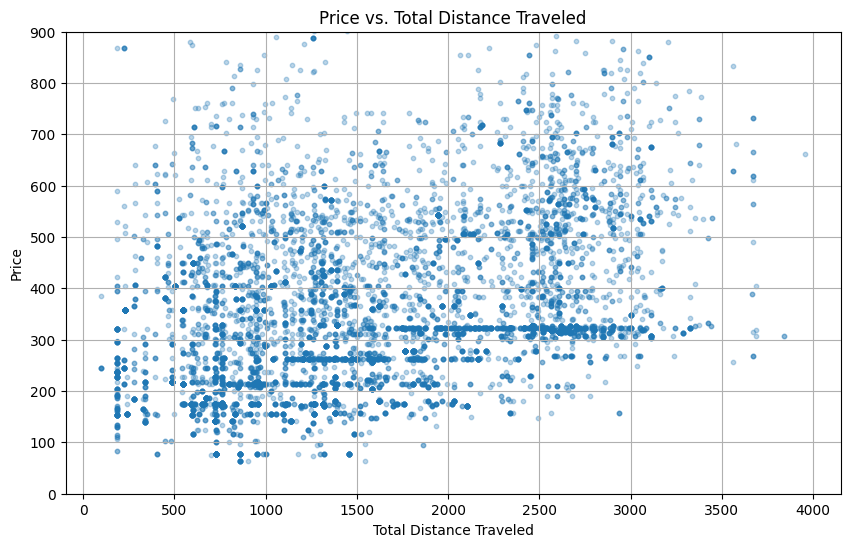

In [5]:
# graph 1: price vs total distance traveled
plt.figure(figsize= (10,6))
plt.scatter(df_graphs['totalTravelDistance'], df_graphs['baseFare'], alpha=.3, s=10)
plt.title('Price vs. Total Distance Traveled')
plt.xlabel('Total Distance Traveled')
plt.ylabel('Price')
plt.ylim(0,900)
plt.grid(True)
plt.show()


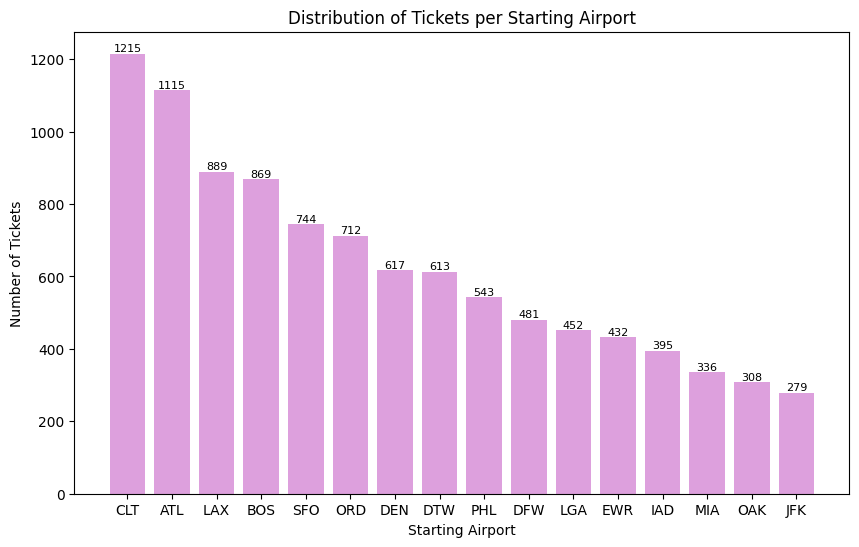

In [6]:
# graph 2: distribution of tickets bought per origin airport
starting_counts = df_graphs['startingAirport'].value_counts()
plt.figure(figsize=(10,6))
bars = plt.bar(starting_counts.index, starting_counts.values, color='plum')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8, color='black')
plt.title('Distribution of Tickets per Starting Airport')
plt.xlabel('Starting Airport')
plt.ylabel('Number of Tickets')
plt.show()

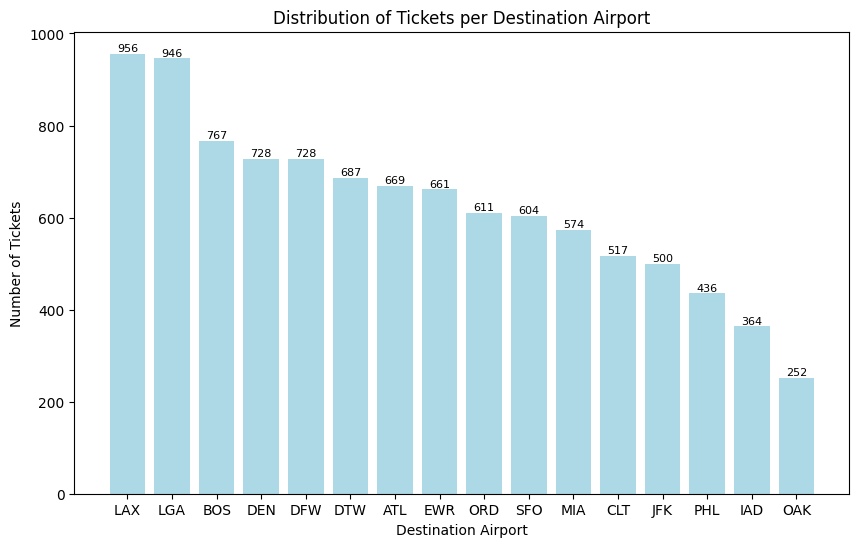

In [7]:
# graph 3: distribution of tickets bought per destination airport
end_counts = df_graphs['destinationAirport'].value_counts()
plt.figure(figsize=(10,6))
bars = plt.bar(end_counts.index, end_counts.values, color='lightblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8, color='black')
plt.title('Distribution of Tickets per Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Tickets')
plt.show()

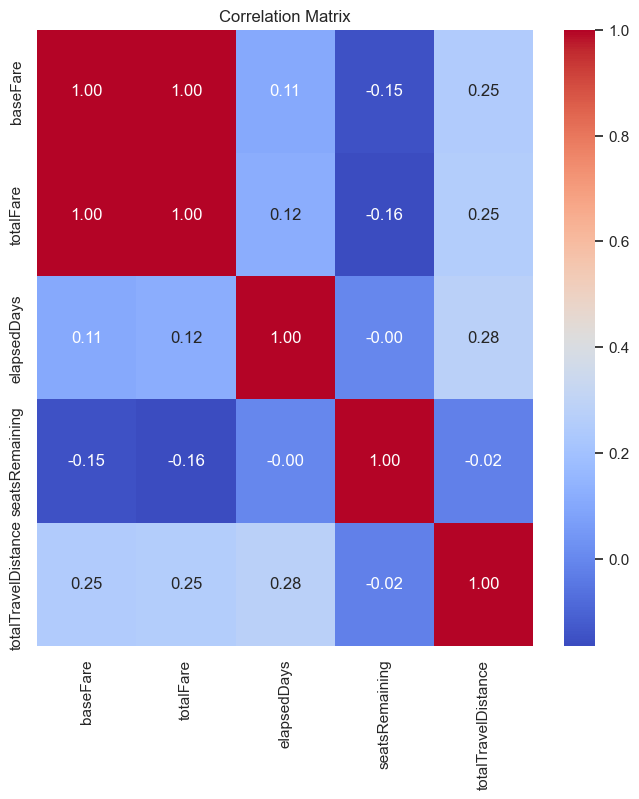

In [8]:
# graph 4: correlation matrix for all numerical variables
columns = ['baseFare', 'totalFare', 'elapsedDays', 'seatsRemaining', 'totalTravelDistance']
subset_df = chunked_df[columns]
corr_matrix = subset_df.corr()

plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

isNonStop    baseFare
0      False  378.630281
1       True  340.668398

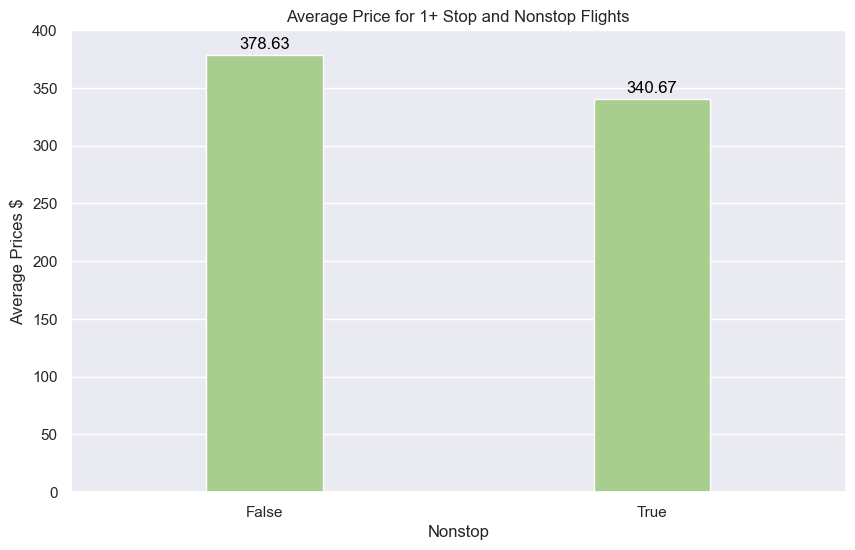

In [20]:
avgPriceNonStop = chunked_df.groupby('isNonStop')['baseFare'].mean().reset_index()
display(avgPriceNonStop)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='isNonStop', y ='baseFare', data=avgPriceNonStop, width = .3, color='#A6D785')
for index, row in avgPriceNonStop.iterrows():
    ax.text(index, row['baseFare'] + 5, str(round(row['baseFare'], 2)), color='black', ha='center')
plt.ylim(0,400)
plt.title('Average Price for 1+ Stop and Nonstop Flights')
plt.xlabel('Nonstop')
plt.ylabel('Average Prices $')
plt.show()

isBasicEconomy    baseFare
0           False  370.746905
1            True  172.951678

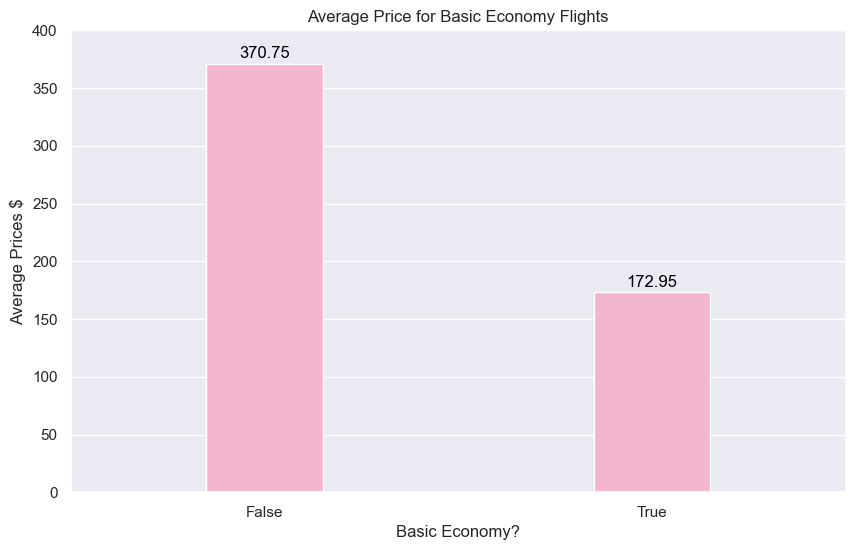

In [21]:
avgPriceEconomy= chunked_df.groupby('isBasicEconomy')['baseFare'].mean().reset_index()
display(avgPriceEconomy)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='isBasicEconomy', y ='baseFare', data=avgPriceEconomy, width = .3, color='#FFAACC')
for index, row in avgPriceEconomy.iterrows():
    ax.text(index, row['baseFare'] + 5, str(round(row['baseFare'], 2)), color='black', ha='center')
plt.ylim(0,400)
plt.title('Average Price for Basic Economy Flights')
plt.xlabel('Basic Economy?')
plt.ylabel('Average Prices $')
plt.show()



Mean Squared Error: 51118.346183255315


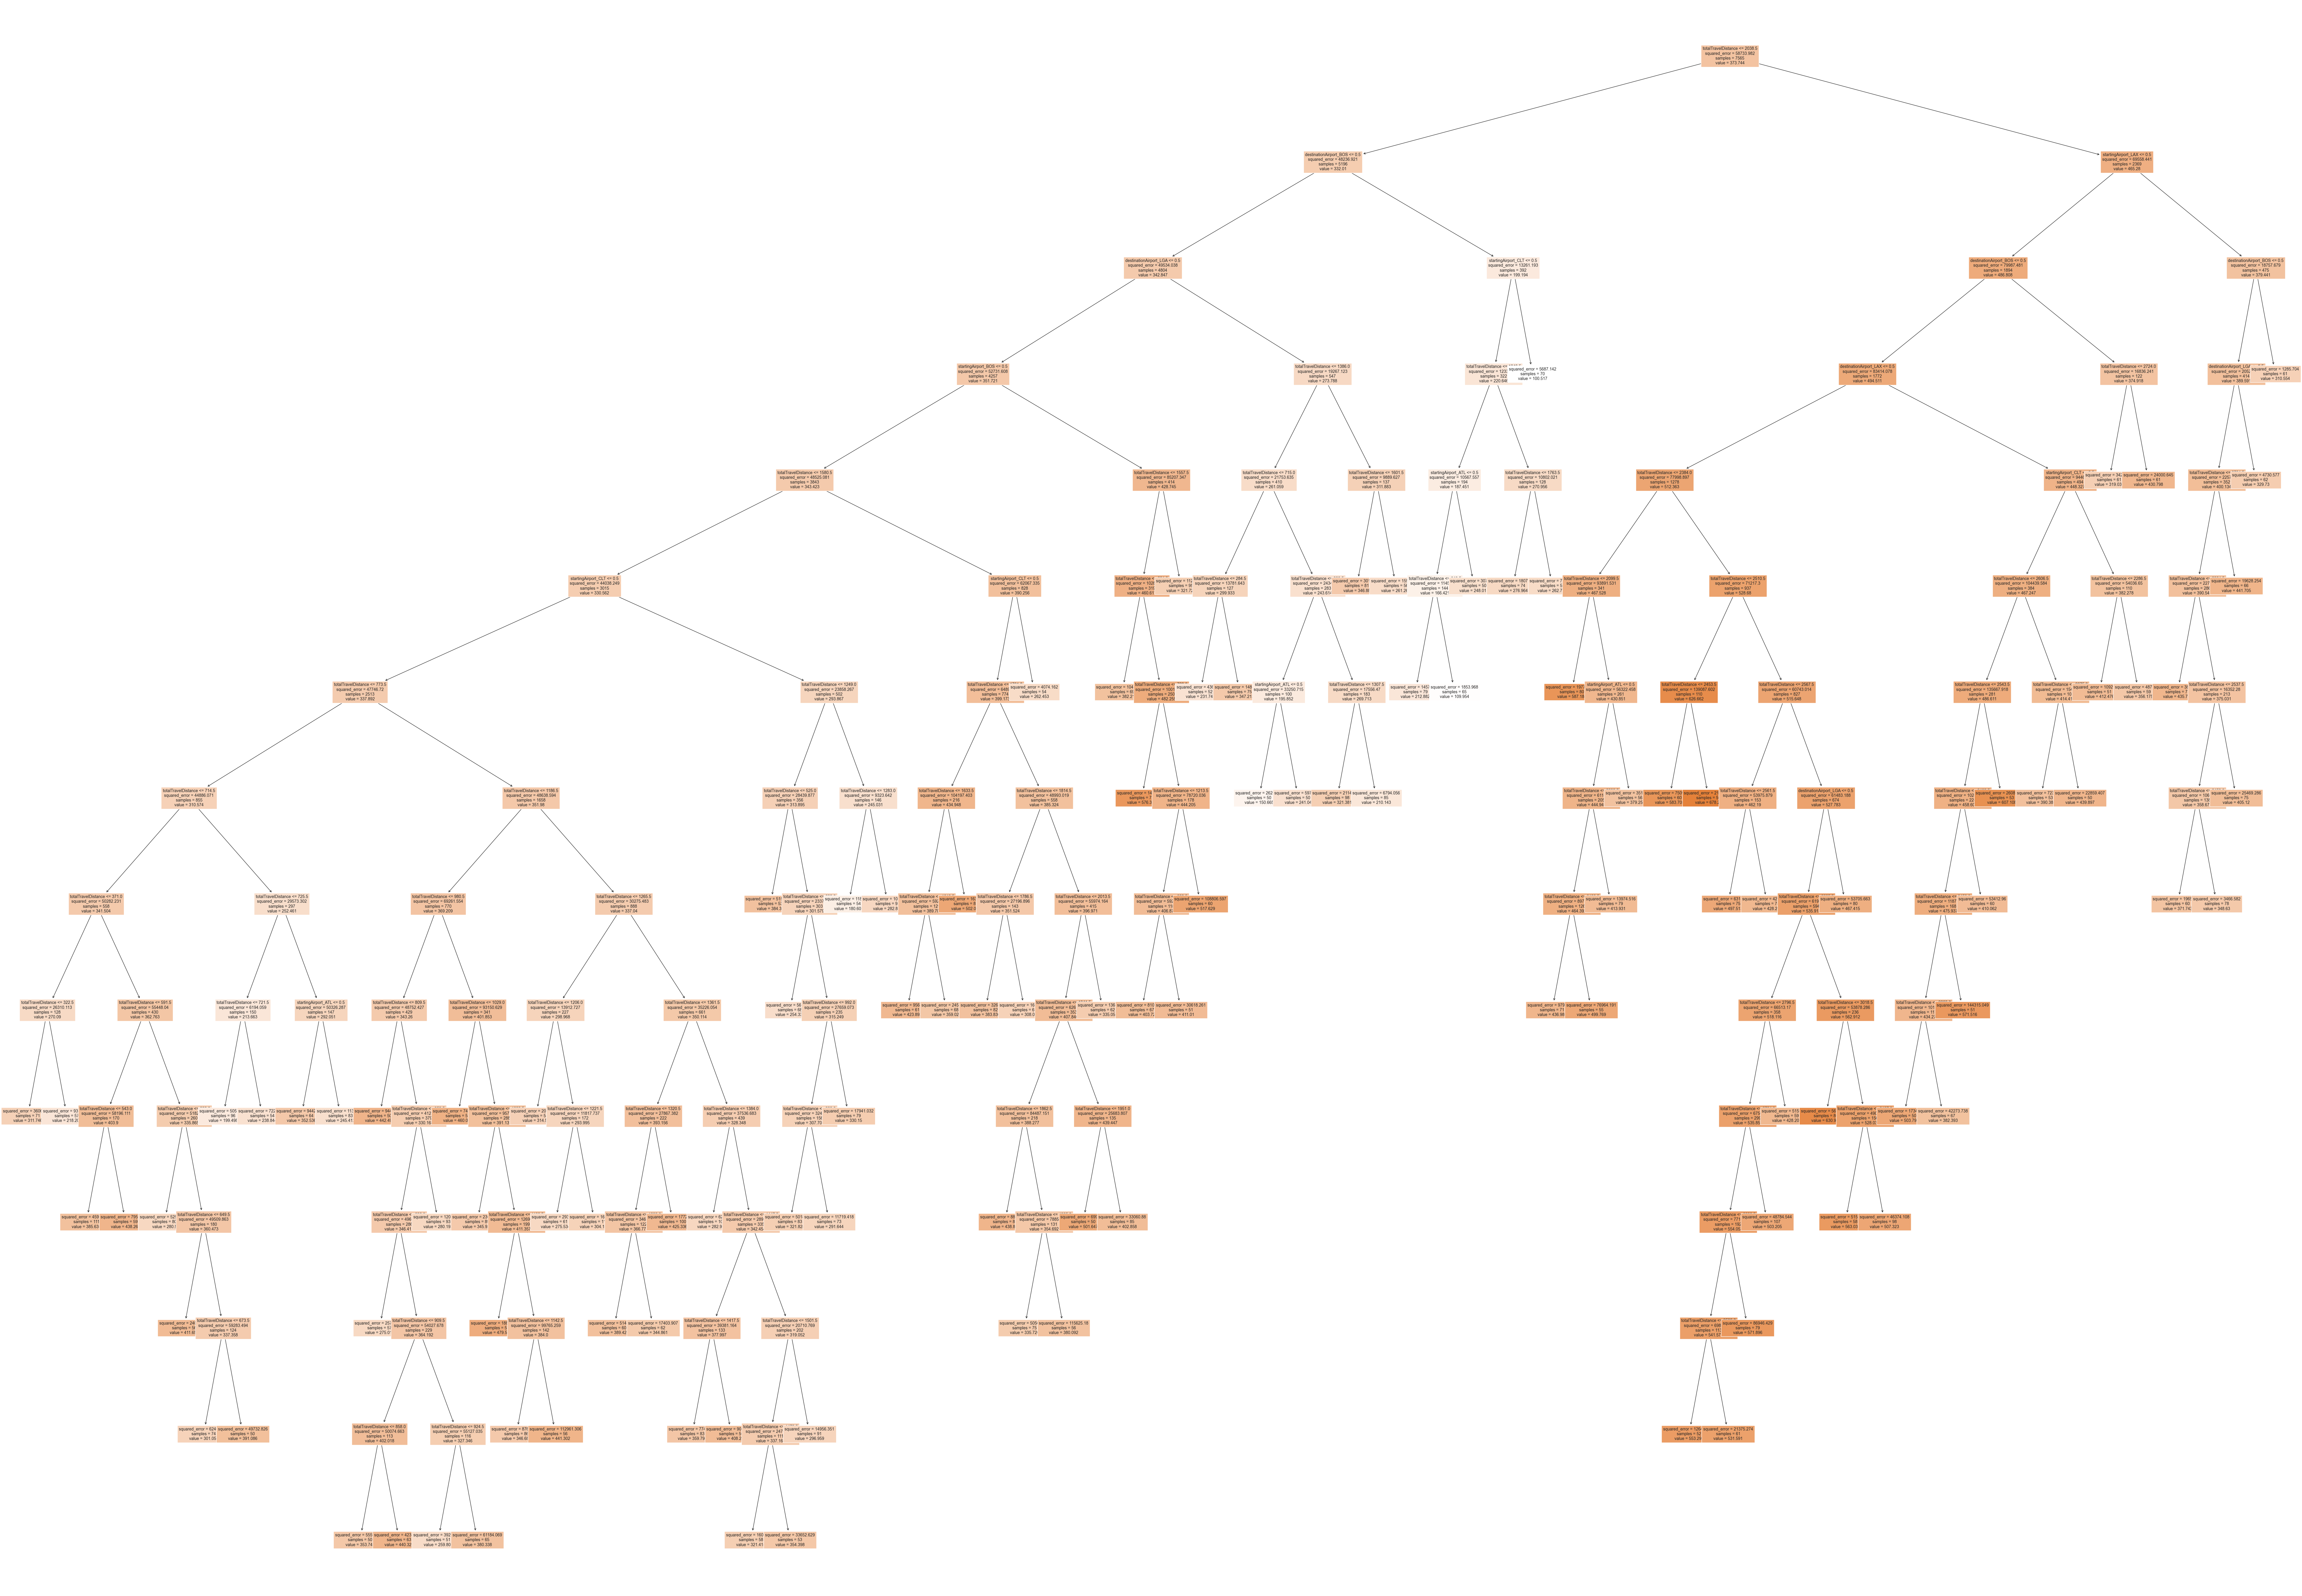

In [47]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import export_text


chunked_df.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = chunked_df[['startingAirport', 'destinationAirport', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'totalTravelDistance']]
y = chunked_df['baseFare']

# I chose the top 4 starting airports according to the bar plot above and the top 3 destination airports
X = pd.get_dummies(X, columns=['startingAirport', 'destinationAirport'])
# X = X[['totalTravelDistance', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'startingAirport_CLT', 'startingAirport_ATL', 'startingAirport_LAX', 'startingAirport_BOS', 
#        'destinationAirport_LAX', 'destinationAirport_LGA', 'destinationAirport_BOS']]

X = X[['totalTravelDistance', 'startingAirport_CLT', 'startingAirport_ATL', 'startingAirport_LAX', 'startingAirport_BOS', 
       'destinationAirport_LAX', 'destinationAirport_LGA', 'destinationAirport_BOS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(min_samples_split = 100, min_samples_leaf=50)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


plt.figure(figsize=(100,70))
plot_tree(model, feature_names=list(X.columns), filled=True, fontsize=10, max_depth=20)
plt.show()

